# Segmentasi Customer Mall dengan K-Means

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns

In [2]:
df = pd.read_csv('G:\IT\SMT 6\Data Mining\gitub\DATA-MINING_4619\DATA-MINING_4619\TA_DM\Mall_Customers.csv')

In [3]:
df.head(5)

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [4]:
df = df.rename(columns={'Genre':'Gender'})

In [5]:
df.head(5)

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [6]:
df.shape

(200, 5)

In [7]:
# Mencari apakah ada value yang hilang
df.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

# EDA

Annual Income dan Spending Score memiliki sd lebih tinggi dari Age, yang berarti bahwa mereka tersebar dan dapat membantu klastering.

In [8]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


Jika kita melihat pada pairplot Annual Income dan Spending score, jelas bahwa customer dapat dibagi menjadi 5.

Menggabungkan Age dan spending, dapat dibagi menjadi 2 kelompok: kiri atas dan kanan bawah, daya beli kaum muda relatif lebih tinggi.

In [9]:
feature = df.drop(columns='CustomerID')

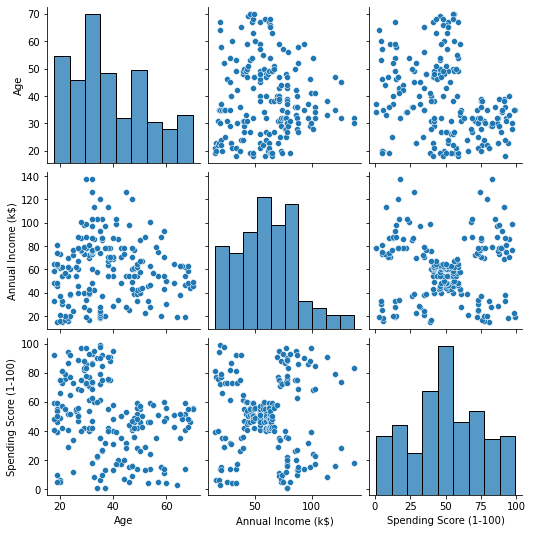

In [10]:
sns.pairplot(feature,kind="scatter")

([<matplotlib.patches.Wedge at 0x260bb6f9430>,
 [Text(-0.22485758633183295, 1.1787446991902115, 'Female'),
  Text(0.2248575863318331, -1.1787446991902115, 'Male')])

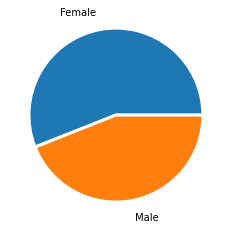

In [11]:
# Rasio pria dan wanita
gender_count = df['Gender'].value_counts()
plt.pie(gender_count.values, labels=gender_count.index, labeldistance=1.2, 
        wedgeprops = { 'linewidth' : 3, 'edgecolor' : 'white' })

Jika kita menyelam lebih dalam ke fitur, diamati bahwa spending score memiliki 3 puncak (0-20,40-60,80-100), sedangkan untuk Annual Income, cenderung miring ke kanan.

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-lev

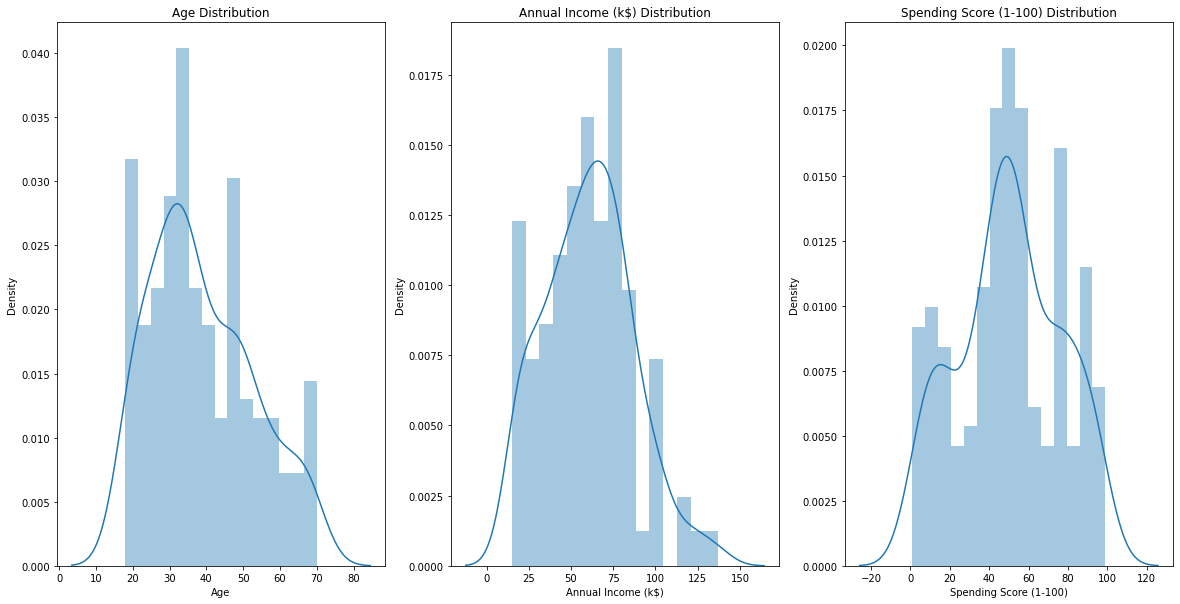

In [12]:
plt.figure(figsize = (20 , 10))
n=1
for x in ['Age' , 'Annual Income (k$)' , 'Spending Score (1-100)']:
    plt.subplot(1,3,n)
    plt.subplots_adjust(hspace =0.5 , wspace = 0.2)
    sns.distplot(df[x], bins = 15)
    plt.title('{} Distribution'.format(x))
    n+=1

# Clustering dengan k-means

In [13]:
from sklearn.cluster import KMeans

K-means clustering merupakan salah satu jenis unsupervised learning, biasanya digunakan ketika kita tidak mengetahui kelompok/kategori mereka. Algoritme menetapkan setiap titik data ke salah satu grup K berdasarkan kesamaan fitur.

Hal ini berguna untuk menemukan kelompok yang belum secara eksplisit diberi label dalam data. Ini dapat digunakan untuk mengkonfirmasi asumsi bisnis tentang jenis grup yang ada atau untuk mengidentifikasi grup yang tidak dikenal dalam kumpulan data yang kompleks.

In [14]:
# Mengubah fitur non-numerik menjadi angka
# Male=0, Female=1
feature.loc[feature['Gender']=='Male','Gender']=0
feature.loc[feature['Gender']=='Female','Gender']=1

# Elbow Method
- Tujuan: Menemukan nilai optimal k di KMeans

- Pokok: 

    memplot nilai fungsi biaya yang dihasilkan oleh nilai k yang berbeda. Ketika k meningkat, titik data dapat lebih lanjut "dipilih" ke cluster terdekat dan jarak antara masing-masing centroid akan berkurang. Namun, peningkatan sum of squared error (SSE) akan menurun dan mulai mendatar dengan meningkatnya k. Distorsi seperti itu menyerupai "elbow".


- Ketentuan:

    1. Distorsi
rata-rata jarak kuadrat euclidean dari pusat massa masing-masing cluster

    2. Inersia
Jumlah kuadrat jarak sampel ke pusat cluster terdekat


Distorsi terutama muncul ketika k berada di antara 3 dan 5, jadi kita harus mencoba k=3/4/5.

In [15]:
inertias = []
for i in range(1, 11):
    km = KMeans(n_clusters=i).fit(feature)
    inertias.append(km.inertia_)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


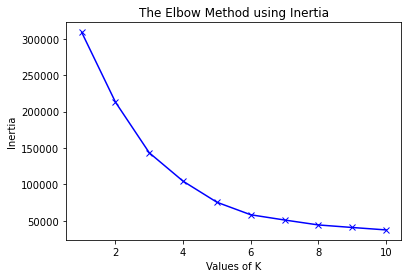

In [16]:
plt.plot(range(1, 11), inertias, 'bx-')
plt.xlabel('Values of K')
plt.ylabel('Inertia')
plt.title('The Elbow Method using Inertia')
plt.show()

In [17]:
inertias

[308862.06000000006,
 212889.44245524294,
 143391.59236035674,
 104414.67534220174,
 75528.58656469136,
 58350.654494628165,
 51165.18423710792,
 44391.82080487078,
 40908.01701421701,
 37568.35848635272]

# Modelling 

Text(0.5, 1.0, 'Segmentasi Customer dengan 3 grup')

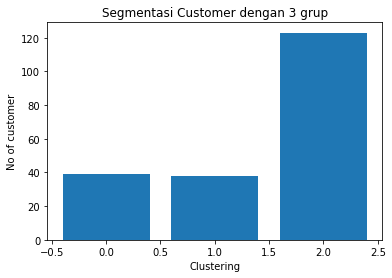

In [18]:
# 3 klastering
# Jumlah customer di setiap grup masing-masing
km = KMeans(n_clusters=3).fit(feature)
y_km = km.fit_predict(feature)
n_cluster, km_count = np.unique(y_km, return_counts=True)
plt.bar(n_cluster, km_count)
plt.ylabel('No of customer')
plt.xlabel('Clustering')
plt.title('Segmentasi Customer dengan 3 grup')

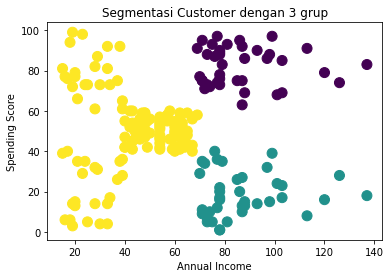

In [19]:
plt.scatter(df['Annual Income (k$)'], 
            df['Spending Score (1-100)'], 
            c=y_km, s=100)


plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.title('Segmentasi Customer dengan 3 grup')

plt.show()

Text(0.5, 1.0, 'Segmentasi Customer dengan 4 grup')

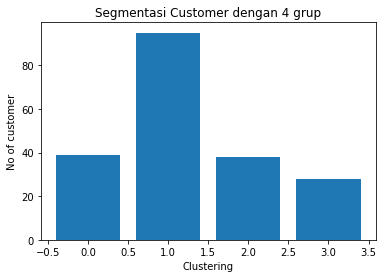

In [20]:
# 4 Klastering
# Jumlah customer di setiap grup masing-masing
km = KMeans(n_clusters=4).fit(feature)
y_km = km.fit_predict(feature)
n_cluster, km_count = np.unique(y_km, return_counts=True)
plt.bar(n_cluster, km_count)
plt.ylabel('No of customer')
plt.xlabel('Clustering')
plt.title('Segmentasi Customer dengan 4 grup')


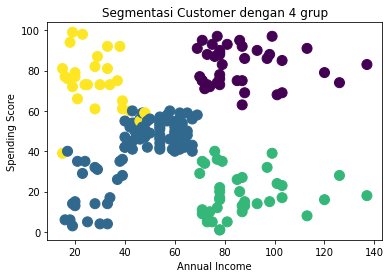

In [21]:
plt.scatter(df['Annual Income (k$)'], 
            df['Spending Score (1-100)'], 
            c=y_km, s=100)


plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.title('Segmentasi Customer dengan 4 grup')

plt.show()

Text(0.5, 1.0, 'Segmentasi Customer dengan 5 grup')

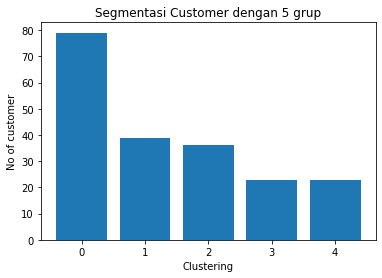

In [22]:
# 5 Klastering
# Jumlah customer di setiap grup masing-masing
km = KMeans(n_clusters=5).fit(feature)
y_km = km.fit_predict(feature)
n_cluster, km_count = np.unique(y_km, return_counts=True)
plt.bar(n_cluster, km_count)
plt.ylabel('No of customer')
plt.xlabel('Clustering')
plt.title('Segmentasi Customer dengan 5 grup')

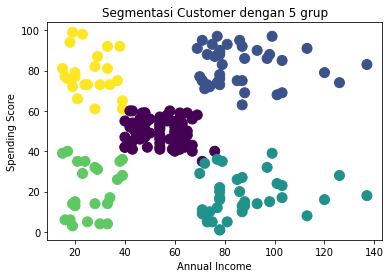

In [23]:
plt.scatter(df['Annual Income (k$)'], 
            df['Spending Score (1-100)'], 
            c=y_km, s=100)


plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.title('Segmentasi Customer dengan 5 grup')

plt.show()